## Project Euler - Problem 111 - Primes with runs

More info at: https://projecteuler.net/problem=111

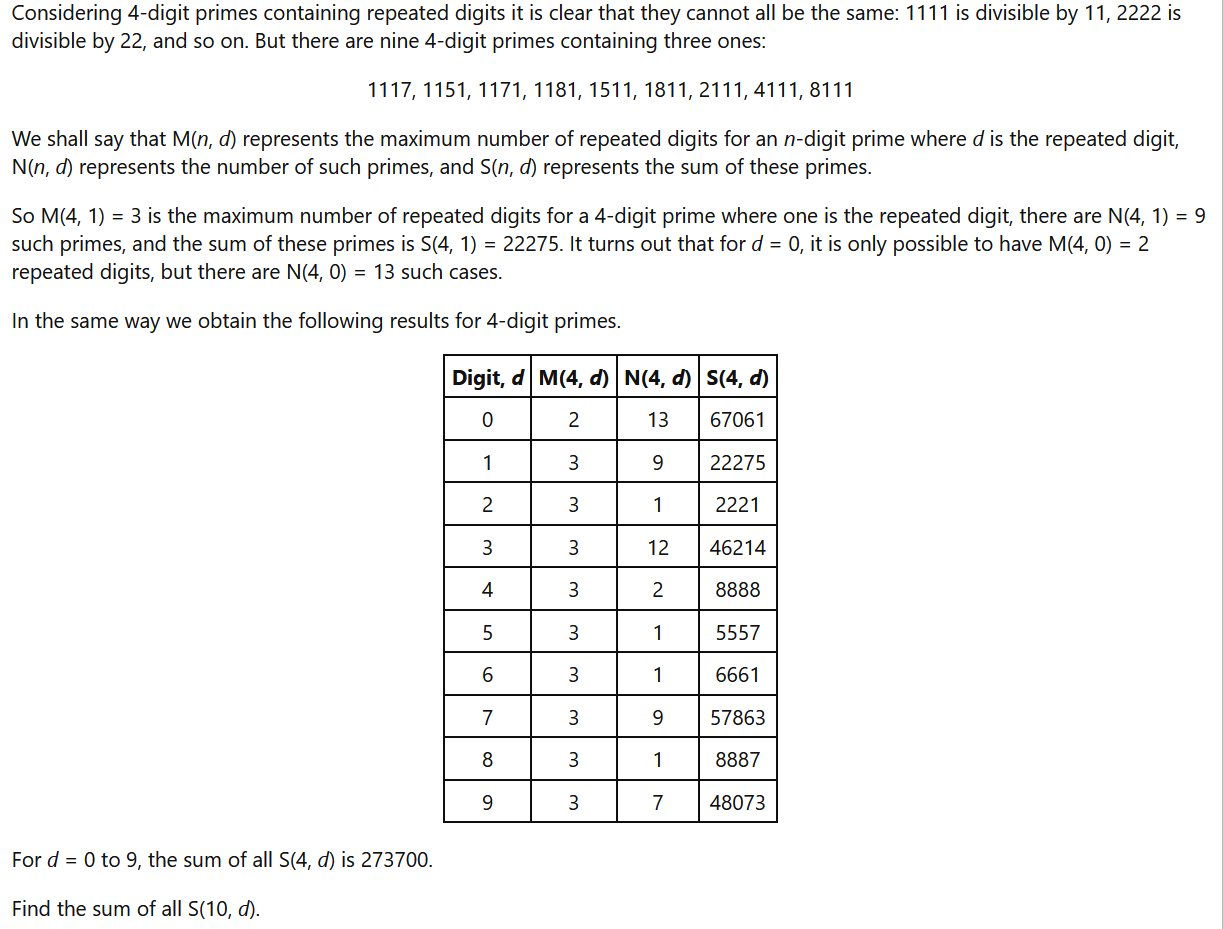

In [1]:
import numpy as np
import pandas as pd
import time as time

## Humble brute force approach

In [2]:
def prime_numbers_generator(n):
    primes = [2]
    for i in range(2,n+1):
        for e,p in enumerate(primes):
            #print(i,'-',p)
            #print(primes)
            if i%p == 0:
                #print('div-2')
                break
            elif e==len(primes)-1:
                primes.append(i)
                break
    return primes

In [4]:
n_digit = 4
begin = 10**(n_digit-1)
end = 10**(n_digit)-1
print(begin,end)

primes_list = prime_numbers_generator(end)

1000 9999


In [5]:
df = pd.DataFrame(data={'Digit,n':[],'M(4,d)':[],'N(4,d)':[],'S(4,d)':[]})
for digit in range(0,10):
    max_count = []
    for i in primes_list:
        count_m = 0
        for d in str(i):
            if int(d)==digit:
                count_m+=1
        max_count.append([count_m,i])

    M = sorted(max_count,reverse=True)[0][0]
    Ns = [x[1] for x in sorted(max_count,reverse=True) if x[0]==M]
    N = len(Ns)
    S = sum(Ns)
    df_row = pd.Series(data=[digit,M,N,S], index=['Digit,n','M(4,d)','N(4,d)','S(4,d)'], name=None)
    df = df.append(df_row, ignore_index=True)

In [6]:
df

,"Digit,n","M(4,d)","N(4,d)","S(4,d)"
0,0.0,2.0,13.0,67061.0
1,1.0,3.0,9.0,22275.0
2,2.0,3.0,1.0,2221.0
3,3.0,3.0,12.0,46214.0
4,4.0,3.0,2.0,8888.0
5,5.0,3.0,1.0,5557.0
6,6.0,3.0,1.0,6661.0
7,7.0,3.0,9.0,57863.0
8,8.0,3.0,1.0,8887.0
9,9.0,3.0,7.0,48073.0


In [8]:
df['S(4,d)'].sum()

273700.0

In [7]:
len(primes_list)

1229

Unfortunately this approach does not scale well for higher digits, probably an analytical solution exists but I have so far not explored it